<a href="https://colab.research.google.com/github/Sachin-NeU/INFO-7390-Advanced-Data-Science/blob/master/Stanford_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Deep Learning**</center>

<center><img src="https://drive.google.com/uc?id=1s9oOQ2sxtk8LogKdH1klReRA_4LkfWoL"></center>

**What is Deep Learning?**
<br>Deep learning is a computer software that mimics the network of neurons in a brain. It is a subset of machine learning and is called deep learning because it makes use of deep neural networks. It is one of the machine learning technique that learns features directly from data.

Deep learning algorithms are constructed with connected layers:
- The first layer is called the Input Layer
- The last layer is called the Output Layer
- All layers in between are called Hidden Layers. The word deep means the network join neurons in more than two layers.

**Why deep learning:?**
<BR>When the amounth of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy.
<br><img src="https://drive.google.com/uc?id=1Tduh-pFgpUFwOwWsIa-Y1ta63z95aU3A" width = 400>
    
**Usage fields of deep learning:**
- Speech recognition
- Image classification
- Natural Language Processing (NLP)
- Recommendation systems

# **Stanford Car Dataset**

For this project, we will be using the standaford car dataset.
<br>The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. Tesla Model S 2012 or BMW M3 coupe 2012.
<br>**Input:** Car image
<br>**Output:** Brand of the car

I'll be using Tensorflow for this project. TensorFlow is a framework created by Google for creating Deep Learning models. Machine Learning has enabled us to build complex applications with great accuracy. Whether it has to do with images, videos, text or even audio, Machine Learning can solve problems from a wide range. Tensorflow can be used to achieve all of these applications. The reason for its popularity is the ease with which developers can build and deploy applications. Moreover, Tensorflow was created with processing power limitations in mind. The library can be ran on computers of all kinds.
    

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

## Mount the google drive to load images from the training and test dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = "/content/gdrive/My Drive/Colab Notebooks/StanfordCarDataset/car_data"

train_data_dir = root_path + '/train'
validation_data_dir = root_path + '/test'

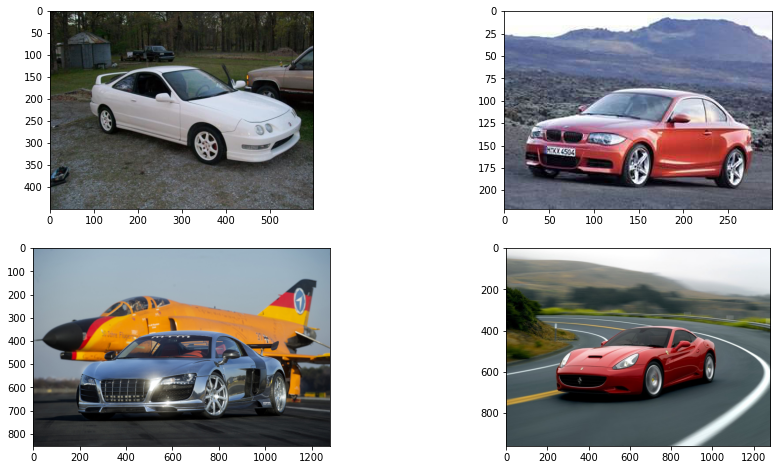

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
img1 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/StanfordCarDataset/car_data/train/Acura Integra Type R 2001/00198.jpg")
img2 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/StanfordCarDataset/car_data/train/BMW 1 Series Coupe 2012/00598.jpg")
img3 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/StanfordCarDataset/car_data/test/Audi R8 Coupe 2012/00309.jpg")
img4 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/StanfordCarDataset/car_data/test/Ferrari California Convertible 2012/00291.jpg")
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4  =axes[1,1]
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)


# **Image Augmentation**

Data augmentation is a strategy used to increase the amount of data by using techniques like cropping, padding, flipping, etc. It makes the model more robust to slight variations, and hence prevents the model from overfitting.
It is neither practical nor efficient to store the augmented data in memory, and that is where the ImageDataGenerator class from tensorflow.keras comes into play. ImageDataGenerator generates batches of tensor image data with real-time data augmentation. The output images generated by the generator will have the same output dimensions as the input images.
ImageDataGenerator generate batches of tensor image data with real-time data augmentation.
ImageDataGenerator class actually works by:
- Accepting a batch of images
- Taking this batch and applying a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.)
- Replacing the original batch with the new, randomly transformed batch
- Training the model on this randomly transformed batch (i.e., the original data itself is not used for training).

**Arguments:**
- **rescale:** rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations)
- **rotation_range:** By specifying the rotation_range , the data generated is randomly rotated by an angle in the range of +rotation_range to -rotation_range (in degrees)
- **width_shift_range:** The width_shift_range is a floating point number between 0.0 and 1.0 which specifies the upper bound of the fraction of the total width by which the image is to be randomly shifted, either towards the left or right
- **height_shift_range:** Exactly like width shifting, except that the image is shifted vertically instead of horizontally
- **shear_range:** Shear transformation slants the shape of the image. This is different from rotation in the sense that in shear transformation, we fix one axis and stretch the image at a certain angle known as the shear angle. This creates a sort of ‘stretch’ in the image, which is not seen in rotation. shear_range specifies the angle of the slant in degrees.
- **zoom_range:** A random zoom is obtained by the zoom_range argument. A zoom less than 1.0 magnifies the image, while a zoom greater than 1.0 zooms out of the image.
- **horizontal_flip:** The generator will generate images, which on a random basis, will be horizontally flipped.
- **fill_mode:** One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
'nearest': aaaaaaaa|abcd|dddddddd
'reflect': abcddcba|abcd|dcbaabcd
'wrap': abcdabcd|abcd|abcdabcd


In [0]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=8,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 64 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=64,
        #color_mode="grayscale",
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow test images in batches of 64 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=64,
        #color_mode="grayscale",
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 8154 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


#<center>**Convolution Neural Network (CNNs/ConvNets)**</center>
<center><img src="https://drive.google.com/uc?id=1zNnsO2mU4KHR34ESdG46tikMDbgBJ9fn"  height=400></center>

Convolutional Neural Networks are very similar to ordinary Neural Networks: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other.

So what do we need CNNs then? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

Convolutional neural networks have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing and financial time series. One of the aspects of the CNNs that make them so powerful is that they can learn the patterns in one part of the screen and apply it anywhere else. This is in stark contrast to that of the traditional dense nets. For example, a CNN can learn the ear pattern of the cat on the top right corner of the screen (image) and apply it to anywhere else on the screen for the new images that come in. One other aspect of CNN is that it can learn from the hierarchies of patterns. For example, the first layer may learn the pattern of edges, while the subsequent layer may learn the texture, and so on. Also, it is easy to define the number of filters that the user wants from each of the convolutional layers. Filters can be thought of as an individual concept that the network can learn. For example, a high-level concept can be present of eyes, ears, legs, etc.

**CNN Architecture**
<center><img src="https://drive.google.com/uc?id=1fIX21l70nIjI2fDf8Rz-8qXklvYSwLVg"></center>


- INPUT layer: it will hold the raw pixel values of the image, in this case an image of width 128, height 128, and with three color channels R,G,B.
- CONV layer: it will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [128x128x12] if we decided to use 12 filters.
- RELU layer: it will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).
- POOL layer: it will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [16x16x12].
- FC (Fully-Connected) layer: it will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of CIFAR-10. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
history1 = model.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps= 2)

Epoch 1/20
5/5 [==============================] - 25s 5s/step - loss: 8.6137 - acc: 0.0031 - val_loss: 5.2828 - val_acc: 0.0156
Epoch 2/20
5/5 [==============================] - 27s 5s/step - loss: 6.4292 - acc: 0.0094 - val_loss: 5.3355 - val_acc: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 24s 5s/step - loss: 5.7735 - acc: 0.0094 - val_loss: 5.3062 - val_acc: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 29s 6s/step - loss: 5.5159 - acc: 0.0031 - val_loss: 5.2837 - val_acc: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 35s 7s/step - loss: 5.4447 - acc: 0.0000e+00 - val_loss: 5.2857 - val_acc: 0.0078
Epoch 6/20
5/5 [==============================] - 29s 6s/step - loss: 5.3689 - acc: 0.0031 - val_loss: 5.2821 - val_acc: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 33s 7s/step - loss: 5.2760 - acc: 0.0063 - val_loss: 5.2877 - val_acc: 0.0000e+00
Epoch 8/20
5/5 [==============================] - 31s 6s/step - loss: 5.3007 - a

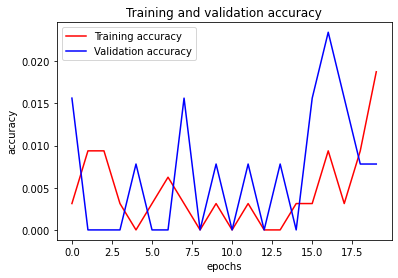

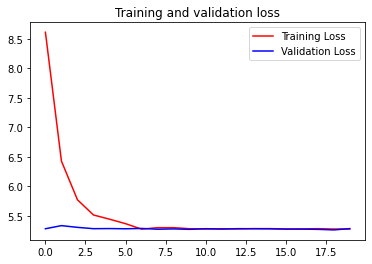

In [0]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
!mkdir -p saved_model
model.save("saved_model/MyModel")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/MyModel/assets


In [0]:
!ls

gdrive	sample_data  saved_model


In [0]:
new_model = tf.keras.models.load_model("saved_model/MyModel")

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      512       
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        2

#**Model B**

Using different Activation function

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.
Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.They introduce non-linear properties to our Network.Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.
<br>A Neural Network without Activation function would simply be a Linear regression Model, which has limited power and does not performs good most of the times. We want our Neural Network to not just learn and compute a linear function but something more complicated than that. Also without activation function our Neural network would not be able to learn and model other complicated kinds of data such as images, videos , audio , speech etc. That is why we use Artificial Neural network techniques such as Deep learning to make sense of something complicated ,high dimensional,non-linear -big datasets, where the model has lots and lots of hidden layers in between and has a very complicated architecture which helps us to make sense and extract knowledge form such complicated big datasets.

Although, there are several activation functions to choose from but in this project, I will be using 3 different activation functions:
- **ReLU (Rectified Linear Unit)**
<br>R(x) = max(0,x) i.e if x < 0 , 
R(x) = 0 and if x >= 0 , R(x) = x
Computationally efficient—allows the network to converge very quickly
Non-linear—although it looks like a linear function, ReLU has a derivative function and allows for backpropagation
Disadvantages
The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.

- **Softmax**
<br>Able to handle multiple classes only one class in other activation functions—normalizes the outputs for each class between 0 and 1, and divides by their sum, giving the probability of the input value being in a specific class.
Useful for output neurons—typically Softmax is used only for the output layer, for neural networks that need to classify inputs into multiple categories.

- **TanH / Hyperbolic Tangent**
<br>Zero centered—making it easier to model inputs that have strongly negative, neutral, and strongly positive values.
Otherwise like the Sigmoid function.

On changing the activation function from Softmax to TanH, the network plateaus early

In [0]:
modelB = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(196, activation='tanh')
])

In [0]:
modelB.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
historyB = modelB.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/20
5/5 [==============================] - 27s 5s/step - loss: 8.6430 - acc: 0.0094 - val_loss: 8.9153 - val_acc: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 32s 6s/step - loss: 7.1210 - acc: 0.0031 - val_loss: 10.3638 - val_acc: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 29s 6s/step - loss: 6.5389 - acc: 0.0063 - val_loss: 1.1921e-07 - val_acc: 0.0078
Epoch 4/20
5/5 [==============================] - 28s 6s/step - loss: 1.1921e-07 - acc: 0.0000e+00 - val_loss: 1.1921e-07 - val_acc: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 29s 6s/step - loss: 1.1921e-07 - acc: 0.0094 - val_loss: 1.1921e-07 - val_acc: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 29s 6s/step - loss: 1.1921e-07 - acc: 0.0106 - val_loss: 1.1921e-07 - val_acc: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 30s 6s/step - loss: 1.1921e-07 - acc: 0.0000e+00 - val_loss: 1.1921e-07 - val_acc: 0.0078
Epoch 8/20
5/5 [=======================

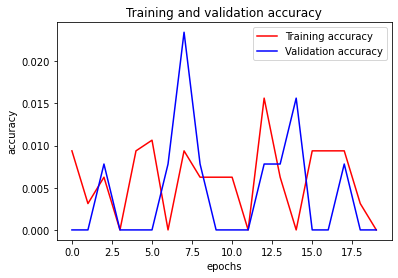

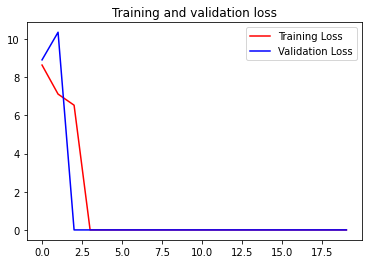

In [0]:
acc = historyB.history['acc']
val_acc = historyB.history['val_acc']
loss = historyB.history['loss']
val_loss = historyB.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model1.save("saved_model/MyModel1")

INFO:tensorflow:Assets written to: saved_model/MyModel1/assets


In [0]:
!ls

content  gdrive  MyModel  sample_data  savedmodel  saved_model


#**Model C**

Trying differnet cost functions

I have used 2 differnet cost functions for this project:

- categorical_crossentropy: Computes the crossentropy loss between the labels and predictions for multi class classification
- MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.

Changing the cost function from categorical crossentropy to MeanAbsoluteError, the network does not plateaus for 20 epochs 

In [0]:
modelC = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 196 output neuron. 
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
modelC.compile(loss='MeanAbsoluteError',
              optimizer='adam',
              metrics=['acc',"mae"])

In [0]:
historyC = modelC.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/20
5/5 [==============================] - 30s 6s/step - loss: 0.0102 - acc: 0.0063 - mae: 0.0102 - val_loss: 0.0102 - val_acc: 0.0078 - val_mae: 0.0102
Epoch 2/20
5/5 [==============================] - 24s 5s/step - loss: 0.0101 - acc: 0.0094 - mae: 0.0101 - val_loss: 0.0102 - val_acc: 0.0000e+00 - val_mae: 0.0102
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.0102 - acc: 0.0000e+00 - mae: 0.0102 - val_loss: 0.0102 - val_acc: 0.0000e+00 - val_mae: 0.0102
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.0102 - acc: 0.0000e+00 - mae: 0.0102 - val_loss: 0.0101 - val_acc: 0.0156 - val_mae: 0.0101
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 0.0102 - acc: 0.0031 - mae: 0.0102 - val_loss: 0.0102 - val_acc: 0.0000e+00 - val_mae: 0.0102
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.0102 - acc: 0.0031 - mae: 0.0102 - val_loss: 0.0102 - val_acc: 0.0000e+00 - val_mae: 0.0102
Epoch 7/20
5/5 [====

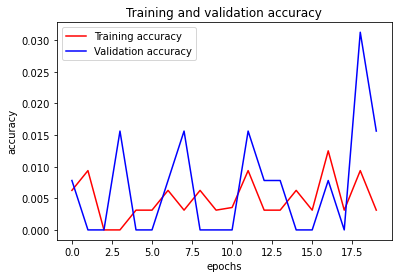

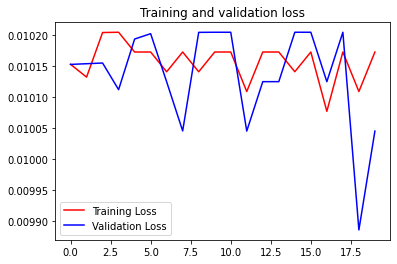

In [0]:
acc = historyC.history['acc']
val_acc = historyC.history['val_acc']
loss = historyC.history['loss']
val_loss = historyC.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**Model D**

Increasing the number of epochs

Increaing the number of epochs from 20 to 50 didnt have any affect as the number plateaued at the early stage

In [0]:
modelD = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 196 output neuron. 
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
modelD.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
historyD = modelD.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=50,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/50
5/5 [==============================] - 9s 2s/step - loss: 6.9359 - acc: 0.0094 - val_loss: 5.2727 - val_acc: 0.0078
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 5.9822 - acc: 0.0094 - val_loss: 5.3404 - val_acc: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 5.3911 - acc: 0.0031 - val_loss: 5.2899 - val_acc: 0.0234
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 5.3490 - acc: 0.0063 - val_loss: 5.2841 - val_acc: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 5.3121 - acc: 0.0063 - val_loss: 5.2714 - val_acc: 0.0078
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 5.3045 - acc: 0.0031 - val_loss: 5.2769 - val_acc: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 5.2865 - acc: 0.0000e+00 - val_loss: 5.2759 - val_acc: 0.0078
Epoch 8/50
5/5 [==============================] - 9s 2s/step - loss: 5.2768 - acc: 0.0000e+00 -

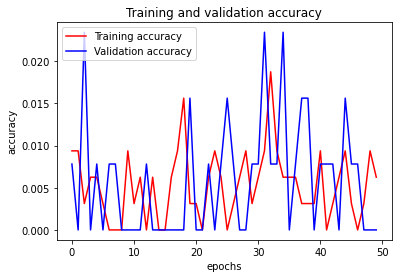

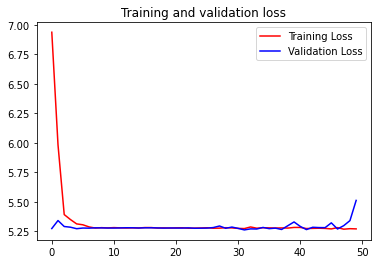

In [0]:
acc = historyD.history['acc']
val_acc = historyD.history['val_acc']
loss = historyD.history['loss']
val_loss = historyD.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**Model E**

Changing the gradient descent

I have used 2 differnet optimizers in this project

- Adam: Optimizer that implements the Adam algorithm.
- RMSprop: Optimizer that implements the RMSprop algorithm.

On changing the optimizer from Adam to RMSprop, we observe that the network does not plateau as it was doing in the case of Adam optimizer

In [0]:
modelE = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 196 output neuron. 
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
modelE.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
historyE = modelE.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 5.6355 - acc: 0.0063 - val_loss: 5.2781 - val_acc: 0.0156
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 5.4555 - acc: 0.0094 - val_loss: 5.2771 - val_acc: 0.0234
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 5.3700 - acc: 0.0094 - val_loss: 5.2741 - val_acc: 0.0156
Epoch 4/20
5/5 [==============================] - 9s 2s/step - loss: 5.3812 - acc: 0.0031 - val_loss: 5.2816 - val_acc: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 5.3565 - acc: 0.0094 - val_loss: 5.2730 - val_acc: 0.0156
Epoch 6/20
5/5 [==============================] - 10s 2s/step - loss: 5.3365 - acc: 0.0000e+00 - val_loss: 5.2976 - val_acc: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 10s 2s/step - loss: 5.3305 - acc: 0.0063 - val_loss: 5.2916 - val_acc: 0.0078
Epoch 8/20
5/5 [==============================] - 10s 2s/step - loss: 5.3804 - acc: 0.0125 - val

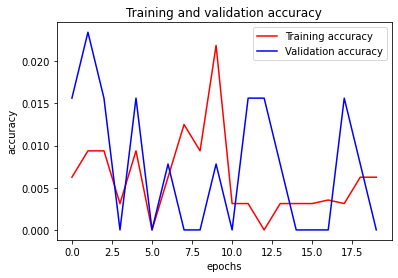

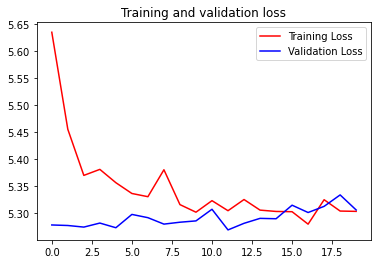

In [0]:
acc = historyE.history['acc']
val_acc = historyE.history['val_acc']
loss = historyE.history['loss']
val_loss = historyE.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**Model F**

Changing the network architecture

The below model has:
- 6 CNN layer
- 3 Dense Layer
- 1 output layer

Increasing the layers, be it a CNN layer or Dense not ensure that it will increase the accuracy or will help to plateau the network

In [0]:
modelF = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
     # The fifth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
     # The sixth convolution
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 196 output neuron. 
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
modelF.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
historyF = modelF.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/20
5/5 [==============================] - 9s 2s/step - loss: 5.4478 - acc: 0.0031 - val_loss: 5.2784 - val_acc: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 5.3540 - acc: 0.0031 - val_loss: 5.2714 - val_acc: 0.0078
Epoch 3/20
5/5 [==============================] - 10s 2s/step - loss: 5.3288 - acc: 0.0031 - val_loss: 5.2721 - val_acc: 0.0078
Epoch 4/20
5/5 [==============================] - 9s 2s/step - loss: 5.3269 - acc: 0.0031 - val_loss: 5.2749 - val_acc: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 5.3103 - acc: 0.0031 - val_loss: 5.2845 - val_acc: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 5.2903 - acc: 0.0063 - val_loss: 5.2725 - val_acc: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 9s 2s/step - loss: 5.3046 - acc: 0.0094 - val_loss: 5.2891 - val_acc: 0.0000e+00
Epoch 8/20
5/5 [==============================] - 10s 2s/step - loss: 5.3057 - acc: 0.0031

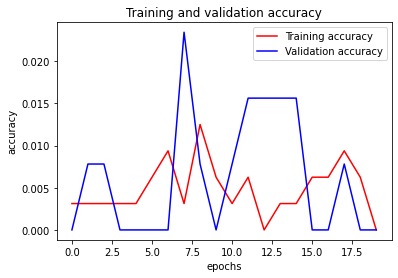

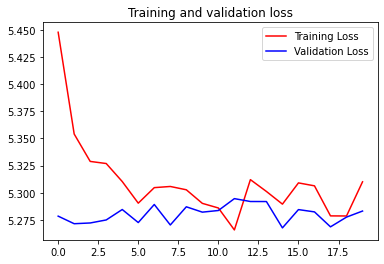

In [0]:
acc = historyF.history['acc']
val_acc = historyF.history['val_acc']
loss = historyF.history['loss']
val_loss = historyF.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**Model G**

Changing the network initialization

Network Initializations define the way to set the initial random weights of layers in model.

I have used 2 differnt network initialization for this project:
- Zeroes: Initializer that generates tensors initialized to 1.
- Glorot uniform initializer or Xavier uniform initializer: It draws samples from a uniform distribution within [-limit, limit] where limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor. It the default keras initializer

Changing the kernel initializer from glorot_uniform to Zeros didnt cause network to plateau

In [0]:
modelG = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), kernel_initializer='Zeros', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), kernel_initializer='Zeros', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), kernel_initializer='Zeros', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), kernel_initializer='Zeros', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, kernel_initializer='Zeros', activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, kernel_initializer='Zeros', activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
modelG.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
historyG = modelG.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 5.2782 - acc: 0.0000e+00 - val_loss: 5.2780 - val_acc: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 5.2783 - acc: 0.0000e+00 - val_loss: 5.2785 - val_acc: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 5.2786 - acc: 0.0031 - val_loss: 5.2777 - val_acc: 0.0078
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 5.2784 - acc: 0.0000e+00 - val_loss: 5.2786 - val_acc: 0.0156
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 5.2779 - acc: 0.0071 - val_loss: 5.2773 - val_acc: 0.0078
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 5.2781 - acc: 0.0031 - val_loss: 5.2787 - val_acc: 0.0078
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 5.2784 - acc: 0.0063 - val_loss: 5.2771 - val_acc: 0.0000e+00
Epoch 8/20
5/5 [==============================] - 9s 2s/step - loss: 5.2785 - acc: 0.0

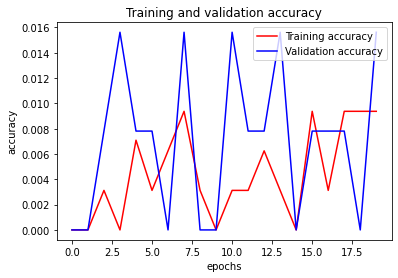

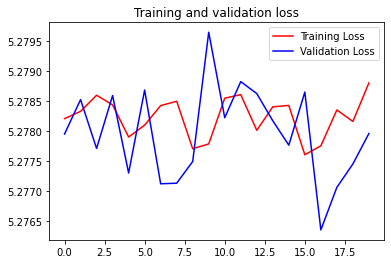

In [0]:
acc = historyG.history['acc']
val_acc = historyG.history['val_acc']
loss = historyG.history['loss']
val_loss = historyG.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
modelG1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), kernel_initializer='glorot_uniform', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), kernel_initializer='glorot_uniform', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The third convolution
    tf.keras.layers.Conv2D(64, (4,4), kernel_initializer='glorot_uniform', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    # The fourth convolution
    tf.keras.layers.Conv2D(96, (3,3), kernel_initializer='glorot_uniform', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, kernel_initializer='glorot_uniform', activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, kernel_initializer='glorot_uniform', activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(196, activation='softmax')
])

In [0]:
modelG1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
historyG1 = modelG1.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=20,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/20
5/5 [==============================] - 9s 2s/step - loss: 6.1826 - acc: 0.0063 - val_loss: 5.2976 - val_acc: 0.0078
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 5.5862 - acc: 0.0031 - val_loss: 5.3533 - val_acc: 0.0234
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 5.6080 - acc: 0.0031 - val_loss: 5.2835 - val_acc: 0.0078
Epoch 4/20
5/5 [==============================] - 9s 2s/step - loss: 5.3895 - acc: 0.0000e+00 - val_loss: 5.2530 - val_acc: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 5.3690 - acc: 0.0094 - val_loss: 5.2806 - val_acc: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 5.3346 - acc: 0.0063 - val_loss: 5.2792 - val_acc: 0.0156
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 5.3314 - acc: 0.0000e+00 - val_loss: 5.2774 - val_acc: 0.0000e+00
Epoch 8/20
5/5 [==============================] - 9s 2s/step - loss: 5.2827 - acc: 0.0063 -

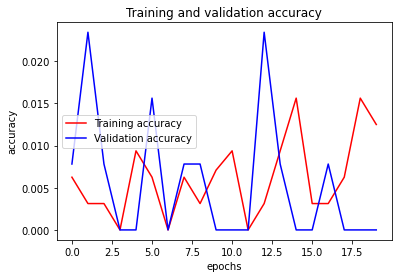

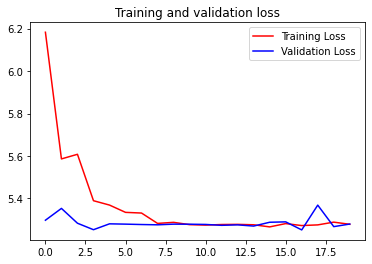

In [0]:
acc = historyG1.history['acc']
val_acc = historyG1.history['val_acc']
loss = historyG1.history['loss']
val_loss = historyG1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**Using PyTorch and Tranfer Learning**

I'll be using a pre-trained resnet34 with transfer learning to train the model

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import time
import os
import PIL.Image as Image
from IPython.display import display

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(device))

cuda:0
Tesla T4


In [0]:
dataset_dir = "/content/gdrive/My Drive/Colab Notebooks/StanfordCarDataset/car_data/"

train_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.ImageFolder(root=dataset_dir+"train", transform = train_tfms)
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 16, shuffle=True, num_workers = 2)

dataset2 = torchvision.datasets.ImageFolder(root=dataset_dir+"test", transform = test_tfms)
testloader = torch.utils.data.DataLoader(dataset2, batch_size = 16, shuffle=False, num_workers = 2)

In [0]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 5):
    
    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially
    model.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(trainloader, 0):

            # get the inputs and assign them to cuda
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(trainloader)
        epoch_acc = 100/32*running_correct/len(trainloader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        
        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model)
        test_accuracies.append(test_acc)
        
        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies


In [0]:
def eval_model(model):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for i, data in enumerate(testloader, 0):
            images, labels = data
            #images = images.to(device).half() # uncomment for half precision model
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model_ft(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (
        test_acc))
    return test_acc

In [0]:
model_ft = models.resnet34(pretrained=True)
num_ftrs = model_ft.fc.in_features

# replace the last fc layer with an untrained one (requires grad by default)
model_ft.fc = nn.Linear(num_ftrs, 196)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)

lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)


In [0]:
model_ft, training_losses, training_accs, test_accs = train_model(model_ft, criterion, optimizer, lrscheduler, n_epochs=5)

Epoch 1, duration: 165 s, loss: 4.2913, acc: 4.7978
Accuracy of the network on the test images: 17 %
Epoch 2, duration: 160 s, loss: 2.2460, acc: 19.7243
Accuracy of the network on the test images: 47 %
Epoch 3, duration: 159 s, loss: 1.3797, acc: 30.4044
Accuracy of the network on the test images: 58 %
Epoch 4, duration: 159 s, loss: 0.9661, acc: 35.7966
Accuracy of the network on the test images: 67 %
Epoch 5, duration: 158 s, loss: 0.6821, acc: 39.9142
Accuracy of the network on the test images: 70 %
Finished Training


ERROR! Session/line number was not unique in database. History logging moved to new session 65


Text(0.5, 0, 'epoch')

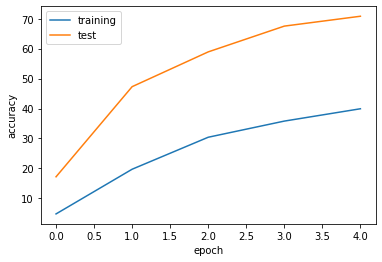

In [0]:
plt.plot(training_accs, label="training")
plt.plot(test_accs, label="test")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("epoch")

#**Conclusion:**

This project covers multiple CNN models on Stanford Car dataset.
Each CNN models depict the importance of its paramters like cost function, activation function, number of epochs and so on and their impact on accuracy and the how it it impact the network plateaus.
Since, there were approx 8000 training data and 196 classes, i.e.; approx 40 images per class, the models were underfitting. There was not enough training data from where model could learn and predict and give high validation accuracy. In order to overcome this, I have used PyTorch and transfer learning. I have used pre-trained model - ResNet34 in this dataset was able to achieve 90% accuracy.

#**Citations**:

- https://www.tensorflow.org/tutorials
- Wikipedia
- https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
- https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
- https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f



In [0]:
!nvidia-smi

Mon Apr  6 00:10:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    24W /  75W |   7609MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#  Copyright 2020 Sachin

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.